In [7]:
import pandas as pd
import matplotlib.pyplot as plt

order_meta = pd.read_csv("csv/order_meta.csv", sep=";")

display(order_meta.head())
order_meta.shape

,id,order_id,meta_key,meta_value
0,79,1036,is_vat_exempt,no
1,80,1036,_billing_address_index,Marlene mgreallyo@quantcast.com Kota Pontiana...
2,81,1036,_shipping_address_index,Marlene mgreallyo@quantcast.com Kota Pontiana...
3,82,1036,_wc_order_attribution_source_type,typein
4,83,1036,_wc_order_attribution_utm_source,(direct)


(1302, 4)

In [30]:
# Tambahkan ip address dan tanggal
df_fact = pd.read_csv("csv/fact_sales_v1.csv", sep=";")
df_fact = df_fact[df_fact['order_item_type'] == 'line_item']
df_fact = df_fact[["order_id", "order_date", "ip_address"]]
df_fact = df_fact.drop_duplicates()
display(df_fact.head())
df_fact.shape

,order_id,order_date,ip_address
0,1036,2025-05-08 22:36:36,118.99.118.196
2,1037,2025-05-08 22:53:26,118.99.118.196
4,1038,2025-05-08 22:56:25,118.99.118.196
6,1039,2025-05-08 22:59:51,118.99.118.196
8,1040,2025-05-08 23:02:06,118.99.118.196


(110, 3)

In [32]:
# Filter baris dengan meta_key '_wc_order_attribution_session_pages'
page_data = order_meta[order_meta["meta_key"] == "_wc_order_attribution_session_pages"]
display(page_data.head())
page_data.shape

,id,order_id,meta_key,meta_value
7,86,1036,_wc_order_attribution_session_pages,9
18,97,1037,_wc_order_attribution_session_pages,20
29,108,1038,_wc_order_attribution_session_pages,31
40,119,1039,_wc_order_attribution_session_pages,40
51,130,1040,_wc_order_attribution_session_pages,50


(110, 4)

In [34]:
df_page = page_data.merge(df_fact, how="left", on="order_id")[['order_date', 'ip_address', 'meta_value']]
display(df_page.head())
df_page.shape

,order_date,ip_address,meta_value
0,2025-05-08 22:36:36,118.99.118.196,9
1,2025-05-08 22:53:26,118.99.118.196,20
2,2025-05-08 22:56:25,118.99.118.196,31
3,2025-05-08 22:59:51,118.99.118.196,40
4,2025-05-08 23:02:06,118.99.118.196,50


(110, 3)

In [ ]:
# df_page.to_csv("page_chart.csv", index=False)
# df = pd.read_csv("page_chart.csv")
# df.head()

In [35]:
# Hitung jumlah interaksi tiap halaman
page_counts = page_data["meta_value"].value_counts().reset_index()
page_counts.columns = ["page", "interaction_count"]
page_counts.sort_values("interaction_count", ascending=False)
display(page_counts.head())
page_counts.shape

,page,interaction_count
0,79,5
1,43,4
2,10,3
3,25,3
4,70,3


(82, 2)

In [36]:
# Ambil 10 page teratas
top_pages = page_counts.head(10).copy()

# Hitung total interaksi untuk persentase
total_interactions = top_pages["interaction_count"].sum()
top_pages["percentage"] = (top_pages["interaction_count"] / total_interactions) * 100

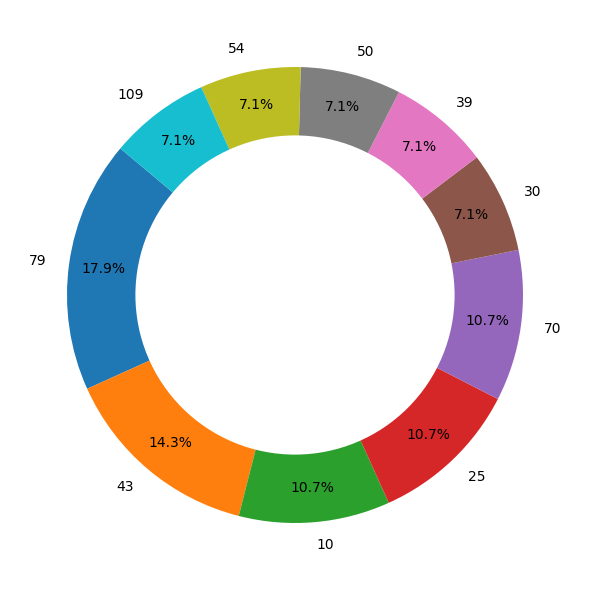

In [24]:
# Buat donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    top_pages["percentage"],
    labels=top_pages["page"],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

# Tambahkan lubang di tengah (donut hole)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)
plt.tight_layout() # menyesuaikan letak subplot: tidak bertumpuk atau terlalu rapat